## Analyse the given dataset to predict insurance expense when new customer wants to avail policy.

### 1. Load data and library 


In [1]:
import pandas as pd # Dataframe
import seaborn as sns # Visualisation
import matplotlib.pyplot as plt # ploting
from sklearn import metrics # ML programs
import numpy as np 
%matplotlib inline 

In [2]:
insure_data = pd.read_csv('~/DATASCIENCE/ML/Project/ML1/insurance.csv')
insure_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 2. EDA


In [131]:
insure_data.shape

(1338, 7)

In [132]:
insure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


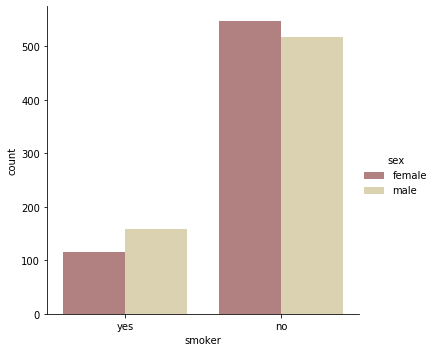

In [133]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=insure_data)


##### From the above plot its observed that there are more non-smokers and men smoke more than women. 

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

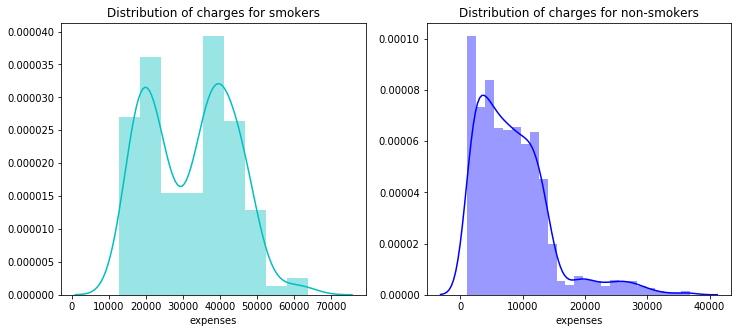

In [135]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insure_data[(insure_data.smoker == 'yes')]["expenses"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(insure_data[(insure_data.smoker == 'no')]['expenses'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

##### From the above plot its observed Smokers are charged higher than non smokers. 

Text(0.5, 1.0, 'Distribution of charges for Male')

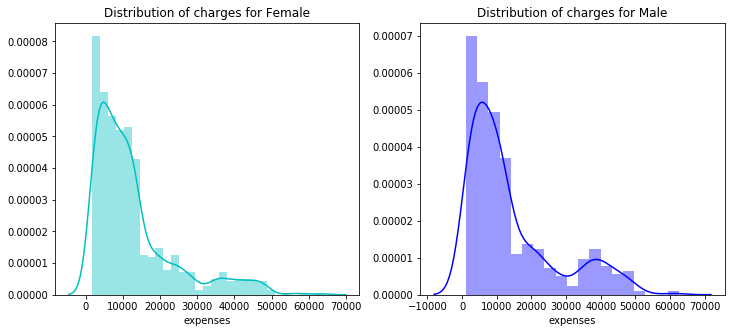

In [136]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(insure_data[(insure_data.sex == 'female')]["expenses"],color='c',ax=ax)
ax.set_title('Distribution of charges for Female')

ax=f.add_subplot(122)
sns.distplot(insure_data[(insure_data.sex == 'male')]['expenses'],color='b',ax=ax)
ax.set_title('Distribution of charges for Male')

##### From the above plot its observed there is no descrimination between Male and Female whiel charing insurance expense

In [124]:
def log():
    print('Sex have these unique values:',insure_data['sex'].unique())
    print('Smoker have these unique values:',insure_data['smoker'].unique())
    print('region have these unique values:',insure_data['region'].unique())
    print()
log()

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insure_data.sex.drop_duplicates()) 
insure_data.sex = le.transform(insure_data.sex)
# smoker or not
le.fit(insure_data.smoker.drop_duplicates()) 
insure_data.smoker = le.transform(insure_data.smoker)
#region
le.fit(insure_data.region.drop_duplicates()) 
insure_data.region = le.transform(insure_data.region)


insure_data.head()

Sex have these unique values: ['female' 'male']
Smoker have these unique values: ['yes' 'no']
region have these unique values: ['southwest' 'southeast' 'northwest' 'northeast']



,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [127]:
insure_data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


### 3. Data Treatment

###### From above data its observed that mean and median values are not close. will Apply log transform since it is scewed. 

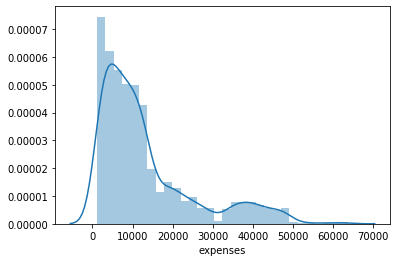

In [126]:
sns.distplot(insure_data.expenses)

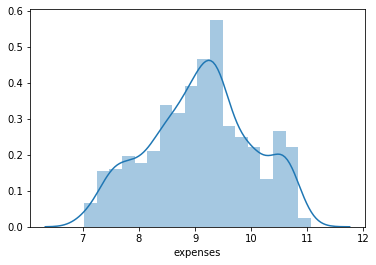

In [125]:
import numpy as np
log_expenses = np.log(insure_data.expenses)
log_expenses.head()
sns.distplot(log_expenses)

### 4. Selecting variables for regression

In [91]:
insure_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [92]:
featuredCol = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X = insure_data[featuredCol]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


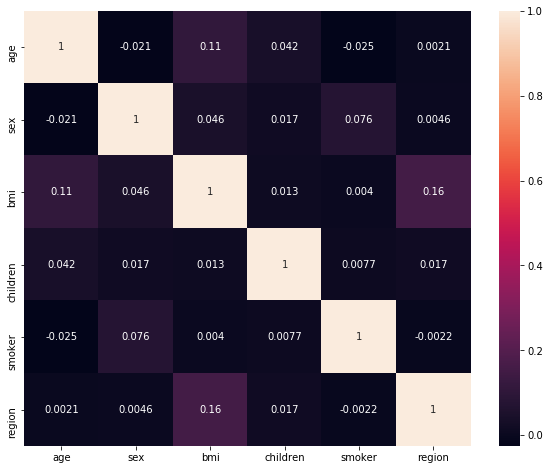

In [93]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
sns.heatmap(X.corr(),annot=True)

###### From the heatmap all variables are not highlty correlated to each other, so we can consider all variables for our prediction. 

### 5. Splitting Train and Test

In [94]:
from sklearn.preprocessing import StandardScaler
X_scaled = pd.DataFrame(StandardScaler().fit(X).transform(X))
X_scaled.columns = featuredCol
X_scaled.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_expenses, test_size=0.20, random_state=1)

In [113]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### 6. Using Linear regression

In [114]:
from sklearn.linear_model import LinearRegression
from math import sqrt
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test) 
y_pred_train = linreg.predict(X_train) 


RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE for the test set is {}'.format(RMSE_test))
print('RMSE for the train set is {}'.format(RMSE_train))

RMSE for the test set is 0.4368920135262959
RMSE for the train set is 0.44555767272825825


In [98]:
SS_Residual = sum((y_train-y_pred_train)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R2 and Adjusted R2 values for train data", r_squared, adjusted_r_squared)

R2 and Adjusted R2 values for test data 0.7623643808212806 0.7610230697064431


In [99]:
SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2 and Adjusted R2 values for test data", r_squared, adjusted_r_squared)

R2 and Adjusted R2 values for test data 0.7837745664764483 0.7788038668552172


In [100]:
print ('Coefficients: ', linreg.coef_)
print("Linear regression score ", linreg.score(X_test,y_test))

Coefficients:  [ 0.48207655 -0.04418649  0.07216889  0.11941867  0.62579938 -0.0545446 ]
Linear regression score  0.7837745664764482


In [101]:
print("untransforming predicted insurance expences")
y_pred_test = pd.DataFrame(y_pred_test)
predicted_expenses = np.exp(y_pred_test)
predicted_expenses.head()

untransforming predicted insurance expences


,0
0,3048.120008
1,10713.439922
2,8430.819010
3,12104.414146
4,2793.328756


### 7. Using Polynomial regression

In [102]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X_scaled)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,log_expenses, random_state = 0)
plr = LinearRegression().fit(X_train,Y_train)

Y_test_pred = plr.predict(X_test)
print(plr.score(X_test,Y_test))

0.8575729327291708


In [103]:
print("untransforming predicted insurance expences")
Y_test_pred = pd.DataFrame(Y_test_pred)
predicted_expenses = np.exp(Y_test_pred)
predicted_expenses.head()

untransforming predicted insurance expences


,0
0,11071.807298
1,9635.743083
2,53068.142039
3,14023.299902
4,9005.485326


### 8. Using Forest regression

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, log_expenses, test_size=0.20, random_state=1)

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)


RMSE_train = np.sqrt(mean_squared_error(y_train,forest_train_pred))
RMSE_Test = np.sqrt(mean_squared_error(y_test,forest_test_pred))
train_R2 = r2_score(y_train,forest_train_pred)
test_R2 = r2_score(y_train,forest_train_pred)
train_R2_adj = 1 - (1-train_R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
test_R2_adj = 1 - (1-test_R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("RMSE and Adjusted R2 values for train data", RMSE_train, train_R2_adj)
print("RMSE and Adjusted R2 values for test data", RMSE_test, test_R2_adj)

RMSE and Adjusted R2 values for train data 0.15341195183231798 0.9716686991826582
RMSE and Adjusted R2 values for test data 0.4368920135262959 0.9711800761650027


In [109]:
print("Random forest regression score ", forest.score(X_test,y_test))

Random forest regression score  0.846146868215747


In [111]:
print("untransforming predicted insurance expences")
Y_test_pred = pd.DataFrame(forest_test_pred)
predicted_expenses = np.exp(Y_test_pred)
predicted_expenses.head()

untransforming predicted insurance expences


,0
0,1539.030370
1,12403.883331
2,8908.717743
3,10351.707277
4,1984.553213


### Considering R2 and Model score it is observed that Random forest regression model and Polynomial regression for 2nd degree turned out to be most accurate to predict the insurance expences